### Step 1 and 2 - Install pyodbc and python-dotenv

In [3]:
# %pip install pyodbc  
# %pip install python-dotenv 

SERVER='dap-projects-database.database.windows.net'
DATABASE='dapDB'
USERNAME='LP2_project'
PASSWORD='Stat$AndD@t@Rul3'

### Step 3 - Import all the necessary packages

In [4]:
import pandas as pd
from  dotenv import dotenv_values
import pyodbc
import sqlalchemy
import numpy as np

### Create a connection by accessing your connection string with your defined environment variables

Step 4 - Create your .env file in the root of your project

Step 5 - In the .env file, put all your sensitive information like server name, password etc

Step 6 & 7 - Next create a .gitignore file and type '/.env' file we just created. This will prevent git from tracking that file.

Step 8 - Create a connection by accessing your connection string with your defined environment variables

In [5]:
# Load environment variables from .env file into a dictionary
environment_variables = dotenv_values('/.env')

# Get the values for the credentials you set in the '.env' file
server = environment_variables.get("SERVER")
database = environment_variables.get("DATABASE")
username = environment_variables.get("USERNAME")
password = environment_variables.get("PASSWORD")

In [6]:
# # Create a connection string
# connection_string = f"DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password};MARS_Connection=yes;MinProtocolVersion=TLSv1.2;"

connection_string = "Driver={SQL Server};Server=dap-projects-database.database.windows.net;Database=dapDB;UID=LP2_project;PWD=Stat$AndD@t@Rul3;"


In [7]:
# Use the connect method of the pyodbc library and pass in the connection string.
# This will connect to the server and might take a few seconds to be complete. 
# Check your internet connection if it takes more time than necessary

connection = pyodbc.connect(connection_string)

In [8]:
# Now the sql query to get the data is what what you see below. 
# Note that you will not have permissions to insert delete or update this database table. 

# query = "SELECT * FROM LP2_Telco_churn_first_3000"

# data = pd.read_sql(query, connection)

query = "SELECT * FROM [LP2_Telco_churn_first_3000]"
try:
    data = pd.read_sql(query, connection)
except Exception as e:
    print("Error reading data:", e)


C:\Users\ovouz\AppData\Local\Temp\ipykernel_19432\2372917480.py:10: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  data = pd.read_sql(query, connection)


In [9]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,False,True,False,1,False,None,DSL,False,...,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.850000,False
1,5575-GNVDE,Male,False,False,False,34,True,False,DSL,True,...,True,False,False,False,One year,False,Mailed check,56.950001,1889.500000,False
2,3668-QPYBK,Male,False,False,False,2,True,False,DSL,True,...,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.150002,True
3,7795-CFOCW,Male,False,False,False,45,False,None,DSL,True,...,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.750000,False
4,9237-HQITU,Female,False,False,False,2,True,False,Fiber optic,False,...,False,False,False,False,Month-to-month,True,Electronic check,70.699997,151.649994,True


In [10]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [11]:
data.describe(include='object').columns

Index(['customerID', 'gender', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod', 'Churn'],
      dtype='object')

In [12]:
data.describe(include='number').columns

Index(['tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        3000 non-null   object 
 1   gender            3000 non-null   object 
 2   SeniorCitizen     3000 non-null   bool   
 3   Partner           3000 non-null   bool   
 4   Dependents        3000 non-null   bool   
 5   tenure            3000 non-null   int64  
 6   PhoneService      3000 non-null   bool   
 7   MultipleLines     2731 non-null   object 
 8   InternetService   3000 non-null   object 
 9   OnlineSecurity    2349 non-null   object 
 10  OnlineBackup      2349 non-null   object 
 11  DeviceProtection  2349 non-null   object 
 12  TechSupport       2349 non-null   object 
 13  StreamingTV       2349 non-null   object 
 14  StreamingMovies   2349 non-null   object 
 15  Contract          3000 non-null   object 
 16  PaperlessBilling  3000 non-null   bool   


In [14]:
data.shape

(3000, 21)

### Concatenating with other data from other sources

In [15]:
# Load the second dataset from GitHub
url_github = "LP2_Telco-churn-second-2000.csv"
data_second = pd.read_csv(url_github)

In [16]:
# Load the testing dataset from OneDrive
url_onedrive = "LP2_Telco-churn-second-2000_1.csv"  # Replace with your link
data_testing = pd.read_csv(url_onedrive)

In [17]:

# Concatenate the datasets
combined_data = pd.concat([data, data_second], ignore_index=True)

# If you want to include the testing dataset as well, you can concatenate it
# combined_data = pd.concat([data, data_second, data_testing], ignore_index=True)

# Display the combined dataset
print(combined_data.head())
print(combined_data.info())

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0    True      False       1        False   
1  5575-GNVDE    Male              0   False      False      34         True   
2  3668-QPYBK    Male              0   False      False       2         True   
3  7795-CFOCW    Male              0   False      False      45        False   
4  9237-HQITU  Female              0   False      False       2         True   

  MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0          None             DSL          False  ...            False   
1         False             DSL           True  ...             True   
2         False             DSL           True  ...            False   
3          None             DSL           True  ...             True   
4         False     Fiber optic          False  ...            False   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0       

### Data Exploration and Preprocessing

Now that we have concatenated the datasets, we can proceed with data exploration and preprocessing as previously mentioned:

1. Check for Missing Values:

In [18]:
combined_data.fillna(method='ffill', inplace=True)  # Example forward fill


C:\Users\ovouz\AppData\Local\Temp\ipykernel_19432\1146610036.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  combined_data.fillna(method='ffill', inplace=True)  # Example forward fill


2. Handle Missing Values:

In [19]:
combined_data.fillna(method='ffill', inplace=True)  # Example forward fill


C:\Users\ovouz\AppData\Local\Temp\ipykernel_19432\1146610036.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  combined_data.fillna(method='ffill', inplace=True)  # Example forward fill


In [20]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5043 non-null   object 
 1   gender            5043 non-null   object 
 2   SeniorCitizen     5043 non-null   int64  
 3   Partner           5043 non-null   object 
 4   Dependents        5043 non-null   object 
 5   tenure            5043 non-null   int64  
 6   PhoneService      5043 non-null   object 
 7   MultipleLines     5042 non-null   object 
 8   InternetService   5043 non-null   object 
 9   OnlineSecurity    5043 non-null   object 
 10  OnlineBackup      5043 non-null   object 
 11  DeviceProtection  5043 non-null   object 
 12  TechSupport       5043 non-null   object 
 13  StreamingTV       5043 non-null   object 
 14  StreamingMovies   5043 non-null   object 
 15  Contract          5043 non-null   object 
 16  PaperlessBilling  5043 non-null   object 


In [21]:
#converting the datatypes for total charges

combined_data['TotalCharges'] = pd.to_numeric(combined_data['TotalCharges'], errors = 'coerce')

data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

In [22]:
print(combined_data['TotalCharges'].dtype)
print(data['TotalCharges'].dtype)

float64
float64


In [23]:
combined_data.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       1
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        3
Churn               0
dtype: int64

### <b>Observation</b><br>
Inpute the missing values<br>
Drop the ones with the fewer missing values<br>
Check for outliers & make sure to standardize if necessary<br>

In [24]:
def unique_values(dataframe):
    unique_summary = []
    for column in dataframe.columns:
        values = dataframe[column].unique()
        counts_values = len(values)
        
        unique_summary.append({
            'Column':column,
            'Unique_values':values,
            'Count_of_Unique_values': counts_values})
    usummary = pd.DataFrame(unique_summary)
    
    return usummary

In [25]:
unique_values(combined_data)

,Column,Unique_values,Count_of_Unique_values
0,customerID,"[7590-VHVEG, 5575-GNVDE, 3668-QPYBK, 7795-CFOC...",5043
1,gender,"[Female, Male]",2
2,SeniorCitizen,"[0, 1]",2
3,Partner,"[True, False, No, Yes]",4
4,Dependents,"[False, True, No, Yes]",4
5,tenure,"[1, 34, 2, 45, 8, 22, 10, 28, 62, 13, 16, 58, ...",73
6,PhoneService,"[False, True, Yes, No]",4
7,MultipleLines,"[None, False, True, No, No phone service, Yes]",6
8,InternetService,"[DSL, Fiber optic, No]",3
9,OnlineSecurity,"[False, True, No, Yes, No internet service]",5


In [26]:
# #droping customer ID column
# combined_data.drop(columns = 'customerID', inplace = True)
# data .drop(columns = 'customerID', inplace = True)

In [27]:
combined_data.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,True,False,1,False,None,DSL,False,...,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.850000,False
1,5575-GNVDE,Male,0,False,False,34,True,False,DSL,True,...,True,False,False,False,One year,False,Mailed check,56.950001,1889.500000,False
2,3668-QPYBK,Male,0,False,False,2,True,False,DSL,True,...,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.150002,True


In [28]:
#converting to Yes and No
labels = combined_data.select_dtypes(include = 'object').columns.tolist()
labels

['customerID',
 'gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

In [29]:
#Convert to strings
combined_data[labels] = combined_data[labels].astype(str)

In [30]:
unique_values(combined_data)

,Column,Unique_values,Count_of_Unique_values
0,customerID,"[7590-VHVEG, 5575-GNVDE, 3668-QPYBK, 7795-CFOC...",5043
1,gender,"[Female, Male]",2
2,SeniorCitizen,"[0, 1]",2
3,Partner,"[True, False, No, Yes]",4
4,Dependents,"[False, True, No, Yes]",4
5,tenure,"[1, 34, 2, 45, 8, 22, 10, 28, 62, 13, 16, 58, ...",73
6,PhoneService,"[False, True, Yes, No]",4
7,MultipleLines,"[None, False, True, No, No phone service, Yes]",6
8,InternetService,"[DSL, Fiber optic, No]",3
9,OnlineSecurity,"[False, True, No, Yes, No internet service]",5


In [31]:
#add a function to make necessary changes
binary = {
    "No":["False","0","No phone service", "No internet service"],
    "Yes":["True", "1"]
}

def correct_column(combined_data, labels, binary):
    for column_name in labels:
        for key, values in binary.items():
            combined_data[column_name]= combined_data[column_name].replace(values,key)
    return combined_data

combined_data = correct_column(combined_data, labels, binary)

In [32]:
#verifying
unique_values(combined_data)

,Column,Unique_values,Count_of_Unique_values
0,customerID,"[7590-VHVEG, 5575-GNVDE, 3668-QPYBK, 7795-CFOC...",5043
1,gender,"[Female, Male]",2
2,SeniorCitizen,"[0, 1]",2
3,Partner,"[Yes, No]",2
4,Dependents,"[No, Yes]",2
5,tenure,"[1, 34, 2, 45, 8, 22, 10, 28, 62, 13, 16, 58, ...",73
6,PhoneService,"[No, Yes]",2
7,MultipleLines,"[None, No, Yes]",3
8,InternetService,"[DSL, Fiber optic, No]",3
9,OnlineSecurity,"[No, Yes]",2


In [33]:
#create a list for the numerical
numbers = combined_data [["tenure", "TotalCharges", "MonthlyCharges"]]
numbers

,tenure,TotalCharges,MonthlyCharges
0,1,29.850000,29.850000
1,34,1889.500000,56.950001
2,2,108.150002,53.849998
3,45,1840.750000,42.299999
4,2,151.649994,70.699997
...,...,...,...
5038,24,1990.500000,84.800000
5039,72,7362.900000,103.200000
5040,11,346.450000,29.600000
5041,4,306.600000,74.400000


### Inputing missing values

In [34]:
#filling for numerical - Total charges
combined_data ['TotalCharges'].fillna(data['TotalCharges'].median(), inplace=True)

C:\Users\ovouz\AppData\Local\Temp\ipykernel_19432\624608943.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  combined_data ['TotalCharges'].fillna(data['TotalCharges'].median(), inplace=True)


In [35]:
#Select the categorical columns with missing values
cat_cols = combined_data[['MultipleLines', 'OnlineSecurity', 'OnlineBackup', 
                          'DeviceProtection', 'TechSupport', 'StreamingTV',
                          'StreamingMovies','Churn']]

for col in cat_cols:
    combined_data[col].replace("",np.nan, inplace = True) #Replace empty strings with NaN
    combined_data[col].replace("NaN",np.nan, inplace = True) #Replace strings 'NaN' with NaN
    combined_data[col].replace("nan",np.nan, inplace=True)
    combined_data[col].fillna(combined_data[col].mode()[0],inplace = True)#Fill all nan with mode
    

C:\Users\ovouz\AppData\Local\Temp\ipykernel_19432\1905140575.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  combined_data[col].replace("",np.nan, inplace = True) #Replace empty strings with NaN
C:\Users\ovouz\AppData\Local\Temp\ipykernel_19432\1905140575.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting valu

In [36]:
#Verfying
for col in cat_cols:
    print(f"Unique Values in {col}: {combined_data[col].unique()}")

Unique Values in MultipleLines: ['None' 'No' 'Yes']
Unique Values in OnlineSecurity: ['No' 'Yes']
Unique Values in OnlineBackup: ['Yes' 'No']
Unique Values in DeviceProtection: ['No' 'Yes']
Unique Values in TechSupport: ['No' 'Yes']
Unique Values in StreamingTV: ['No' 'Yes']
Unique Values in StreamingMovies: ['No' 'Yes']
Unique Values in Churn: ['No' 'Yes']


In [37]:
unique_values(combined_data)

,Column,Unique_values,Count_of_Unique_values
0,customerID,"[7590-VHVEG, 5575-GNVDE, 3668-QPYBK, 7795-CFOC...",5043
1,gender,"[Female, Male]",2
2,SeniorCitizen,"[0, 1]",2
3,Partner,"[Yes, No]",2
4,Dependents,"[No, Yes]",2
5,tenure,"[1, 34, 2, 45, 8, 22, 10, 28, 62, 13, 16, 58, ...",73
6,PhoneService,"[No, Yes]",2
7,MultipleLines,"[None, No, Yes]",3
8,InternetService,"[DSL, Fiber optic, No]",3
9,OnlineSecurity,"[No, Yes]",2


### Univariate Analysis

In [38]:
combined_data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,5043.000000,5043.000000,5043.000000,5043.000000
mean,0.162403,32.576641,65.090214,2302.959420
std,0.368857,24.529807,30.068133,2270.009809
min,0.000000,0.000000,18.400000,18.799999
25%,0.000000,9.000000,35.775000,417.725006
50%,0.000000,29.000000,70.550003,1404.650024
75%,0.000000,56.000000,90.050003,3864.000000
max,1.000000,72.000000,118.650002,8670.100000


In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

Column :tenure
Skewness :0.23
Kurtosis :-1.39
Mean :32.58
Median :29.0
------------------------------


C:\Users\ovouz\AppData\Local\Temp\ipykernel_19432\3238975050.py:27: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


Column :TotalCharges
Skewness :0.94
Kurtosis :-0.28
Mean :2303.49
Median :1401.28
------------------------------


C:\Users\ovouz\AppData\Local\Temp\ipykernel_19432\3238975050.py:27: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


Column :MonthlyCharges
Skewness :-0.24
Kurtosis :-1.25
Mean :65.09
Median :70.55
------------------------------


C:\Users\ovouz\AppData\Local\Temp\ipykernel_19432\3238975050.py:27: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


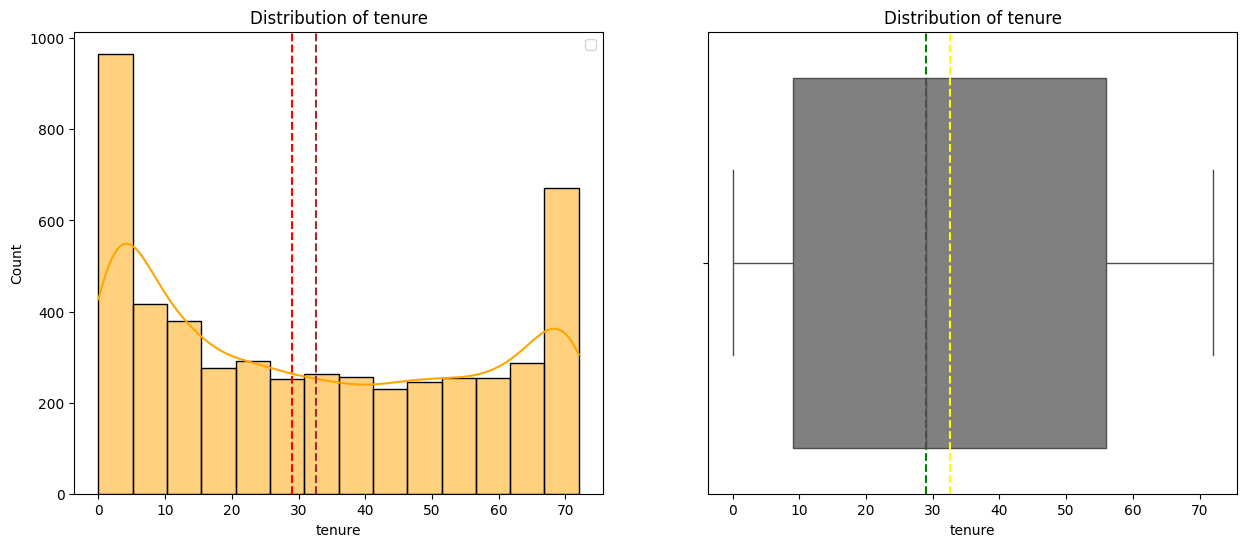

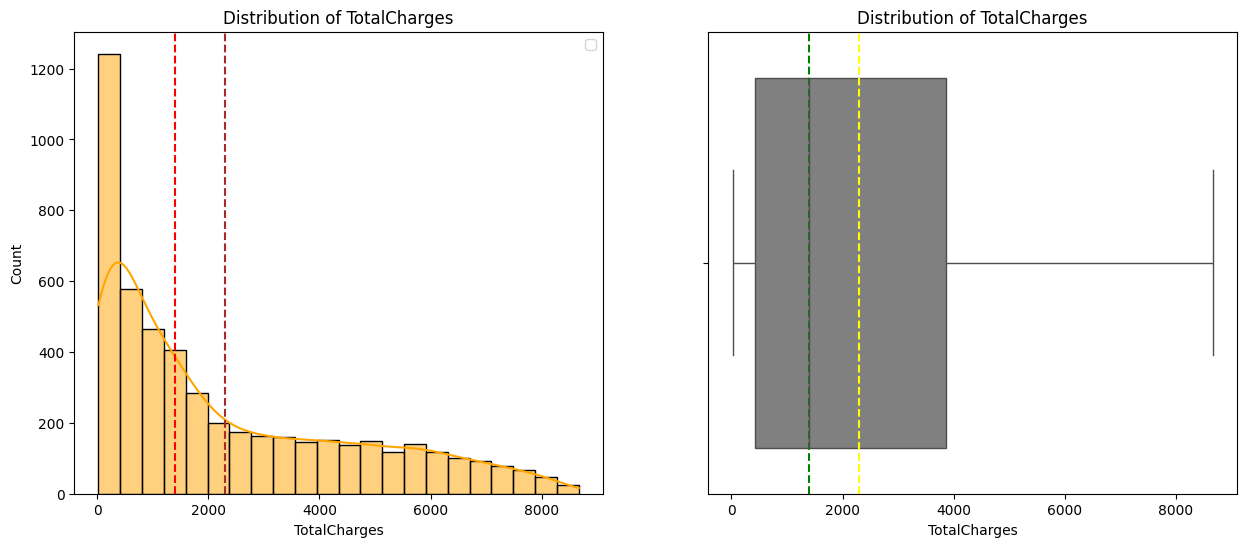

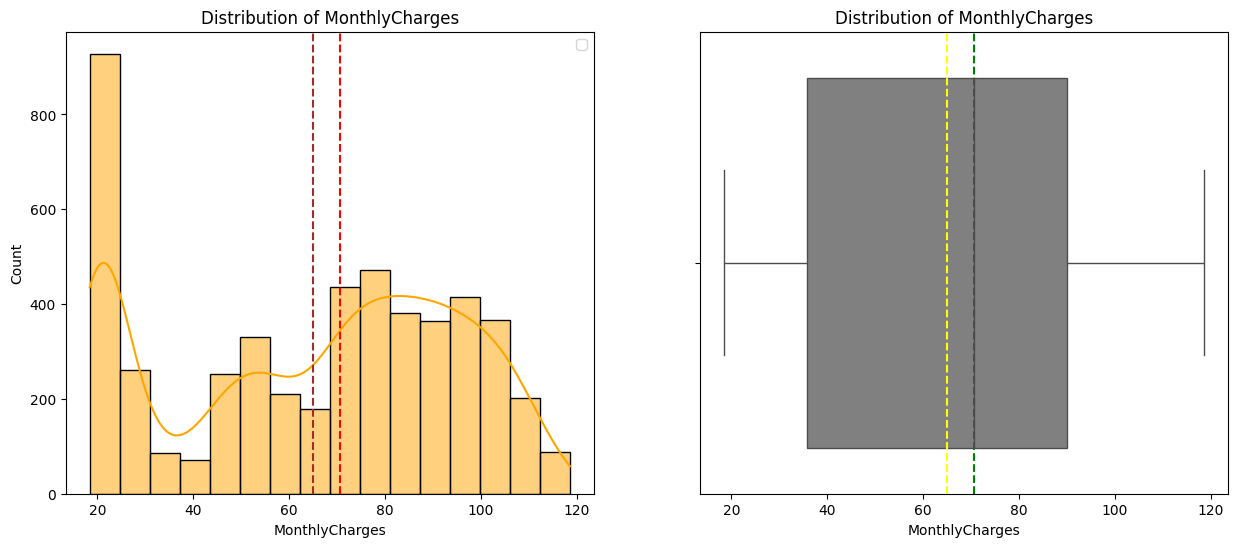

In [40]:
for col in numbers:
    #calculate some statistical measures
    skewness = round(numbers[col].skew(),2)
    kurtosis = round(numbers[col].kurtosis(),2)
    mean = round(numbers[col].mean(),2)
    median = round(numbers[col].median(), 2)
    
#print the columns and their values
    print(f"Column :{col}")
    print(f"Skewness :{skewness}")
    print(f"Kurtosis :{kurtosis}")
    print(f"Mean :{mean}")
    print(f"Median :{median}")
    print("-" * 30)
    #Set plot size
    plt.figure(figsize=(15,6))


    #adding the hisplot
    plt.subplot(1,2,1)
    sns.histplot(numbers[col], kde = True, color='Orange', edgecolor = 'black', fill= True)
    plt.axvline(mean , color = 'brown', linestyle = 'dashed')
    plt.axvline(median, color = 'red', linestyle = 'dashed')
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.legend()

    #adding the boxplot
    plt.subplot(1,2,2)
    sns.boxplot(x = numbers[col], color='gray')
    plt.axvline(mean , color = 'yellow', linestyle = 'dashed')
    plt.axvline(median, color = 'green', linestyle = 'dashed')
    plt.title(f"Distribution of {col}")
    # plt.xlabel(col)
    # plt.ylabel('Count')
    # plt.legend()


C:\Users\ovouz\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
C:\Users\ovouz\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
C:\Users\ovouz\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
C:\Users\ovouz\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:1615: UserWarning: 

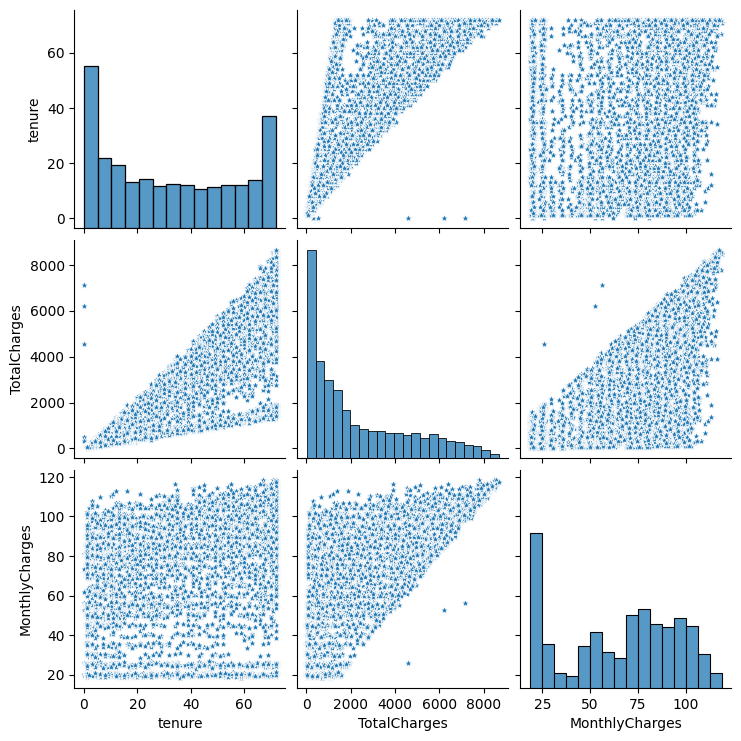

In [41]:
sns.pairplot(numbers, markers = '*', palette= 'viridis')

In [42]:
#for categorical feature
def visual_cat(combined_data, column):
    fig, axes = plt.subplots(3, len(column), figsize=(15,20))
    
    for i, column in enumerate(column):
        
        count_ax = sns.countplot(x=combined_data[column], ax=axes[0,i], color = 'blue')
        axes[0,1].set_title(f"Countplot of {column}")
        
        #add labels
        total = len(combined_data)
        for container in count_ax.containers:
            label = [f"{h.get_height()} ({h.get_height() / total*100:.2f}%" if h.get_height() > 0 else '' for h in container ]
            count_ax.bar_label(container, label)
        
        #boxplot
        sns.boxplot(combined_data[column], ax = axes[1,i], color = 'green')
        axes[1,i].set_title(f"Boxplot of {column}")
        
        #add labels
        freq = combined_data[column].mode()
        axes[1,i].text(0.05,freq,f"Mode:{freq}", color='black', va='center')
        
        
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

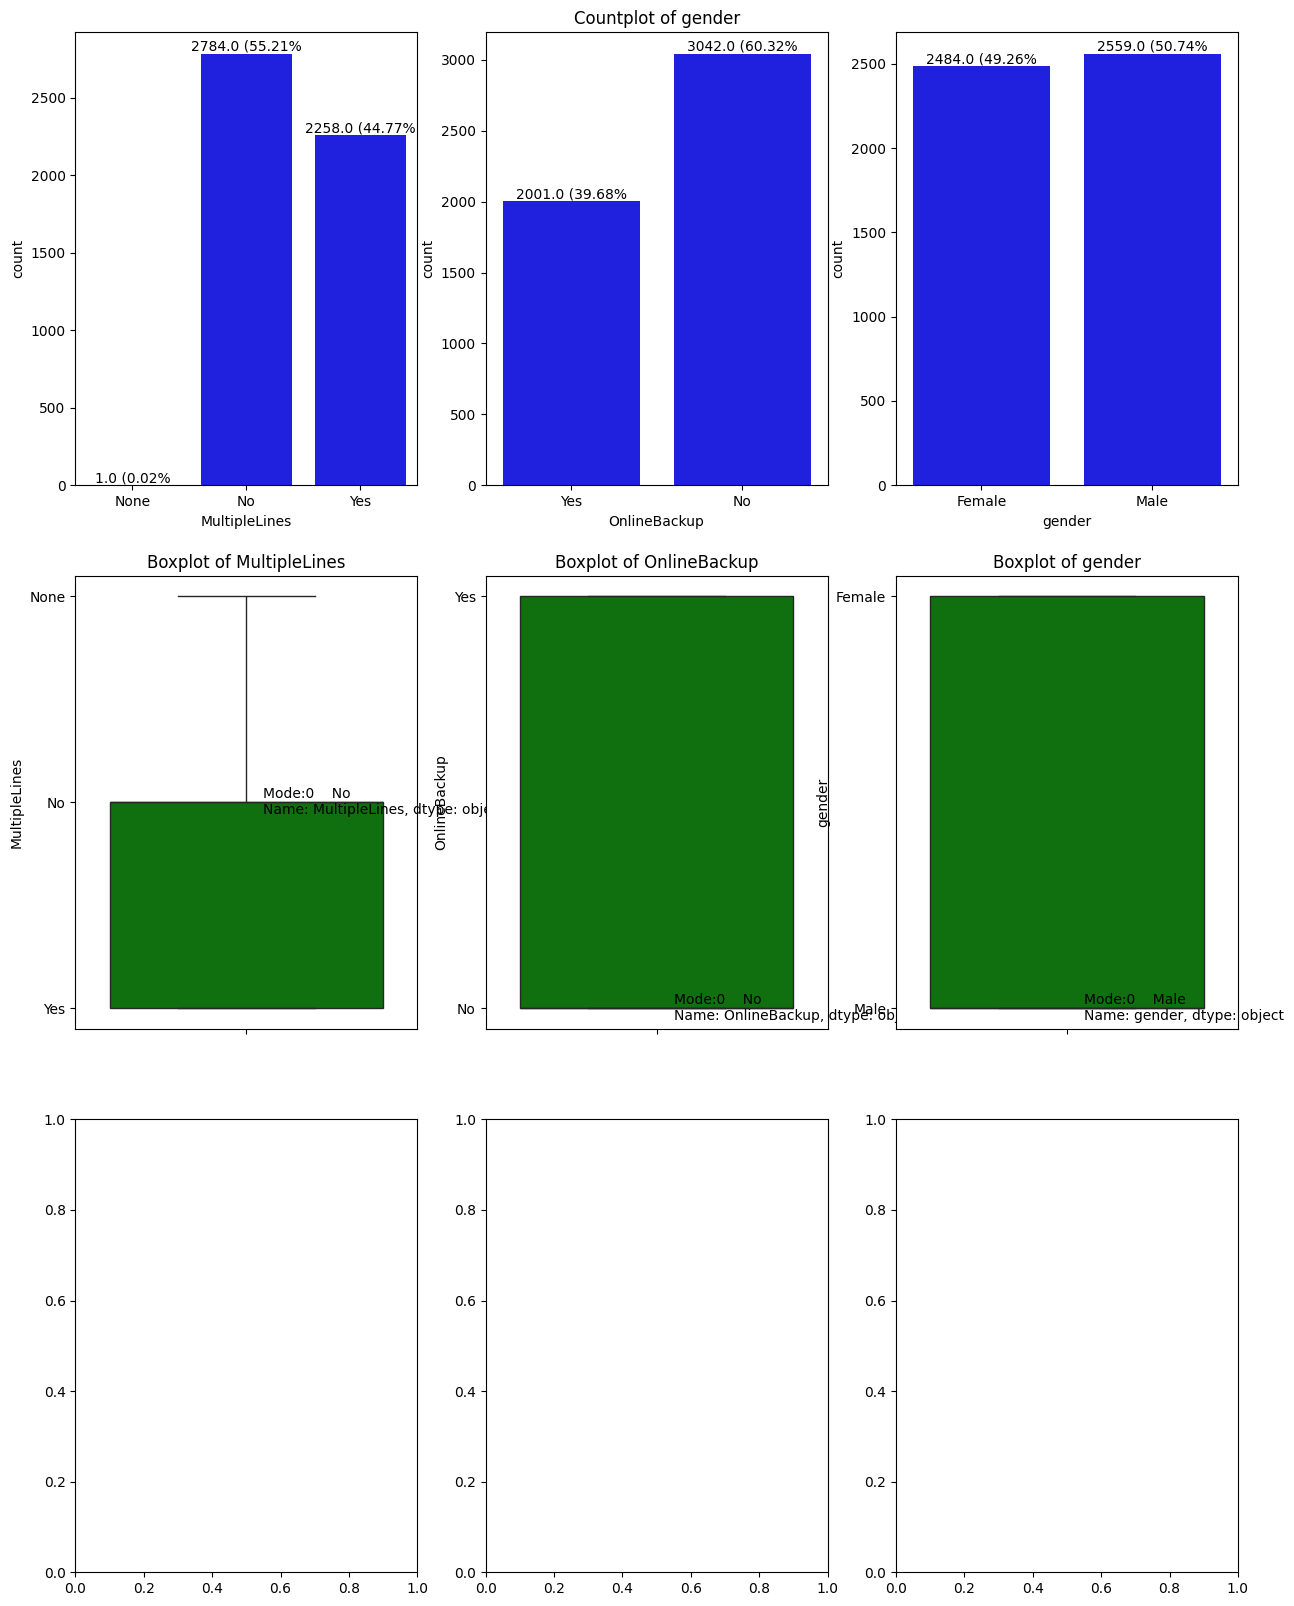

In [43]:
visual_cat(combined_data, ['MultipleLines','OnlineBackup','gender'])

### Bivariate analysis

['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']


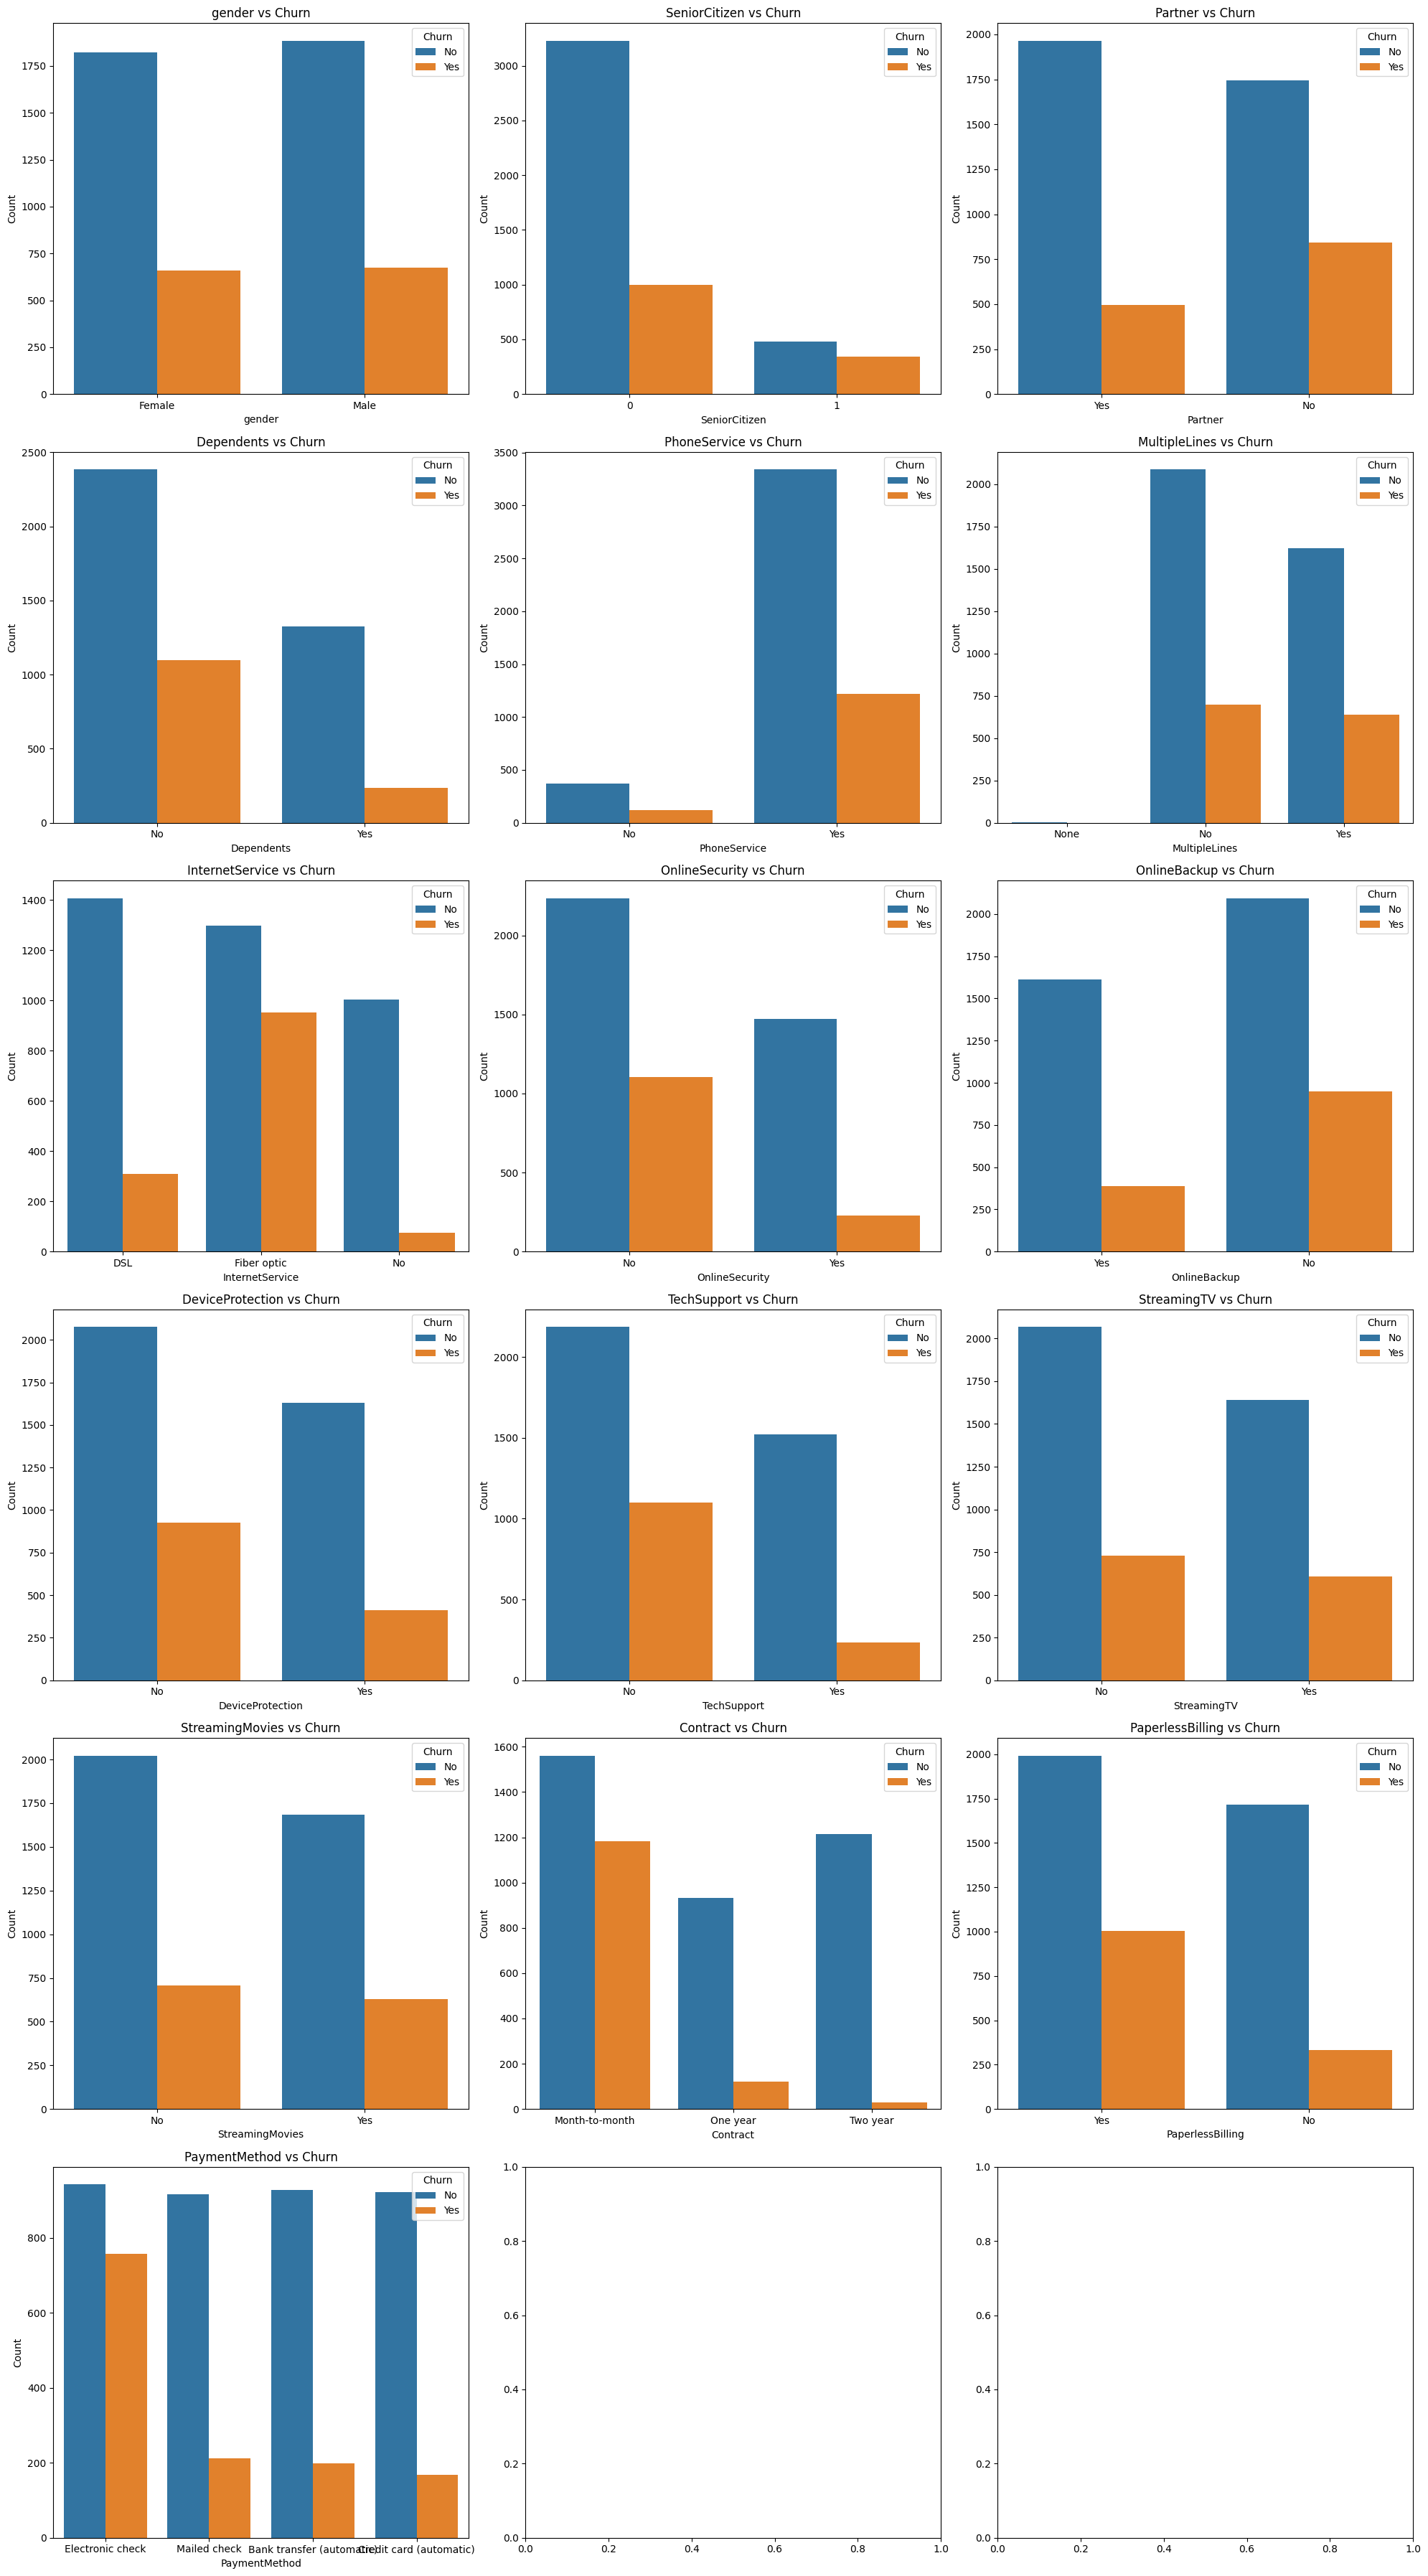

In [61]:
import math
all_columns = combined_data.columns.tolist()
# print(all_columns)

selected_columns = [col for col in all_columns if col not in ['customerID', 'tenure', 'TotalCharges', 'Churn','MonthlyCharges']]
print(selected_columns)

len(selected_columns)

def plot_categorical_vs_target(data, categorical_columns, target):
    n_rows = math.ceil(len(selected_columns) / 3)
    
    fig, axes = plt.subplots(n_rows, 3, figsize=(20, 6 * n_rows))
    
    axes = axes.flatten()  # Flatten the axes array to ensure correct indexing
    
    for i, column in enumerate(selected_columns):
        sns.countplot(data=data, x=column, hue=target, ax=axes[i])
        axes[i].set_title(f'{column} vs {target}')
        axes[i].set_xlabel(column)
        axes[i].set_ylabel('Count')
    
    plt.tight_layout()
    plt.show()

# Example usage
categorical_columns = combined_data.select_dtypes(include=['object']).columns.tolist()
plot_categorical_vs_target(combined_data, selected_columns, 'Churn')

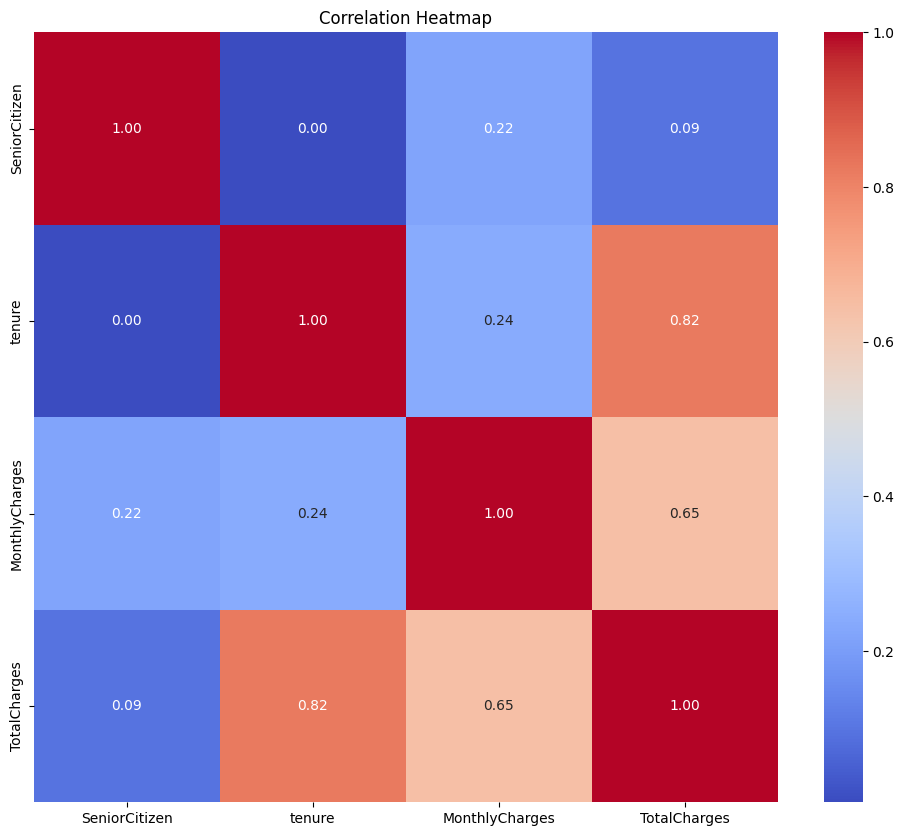

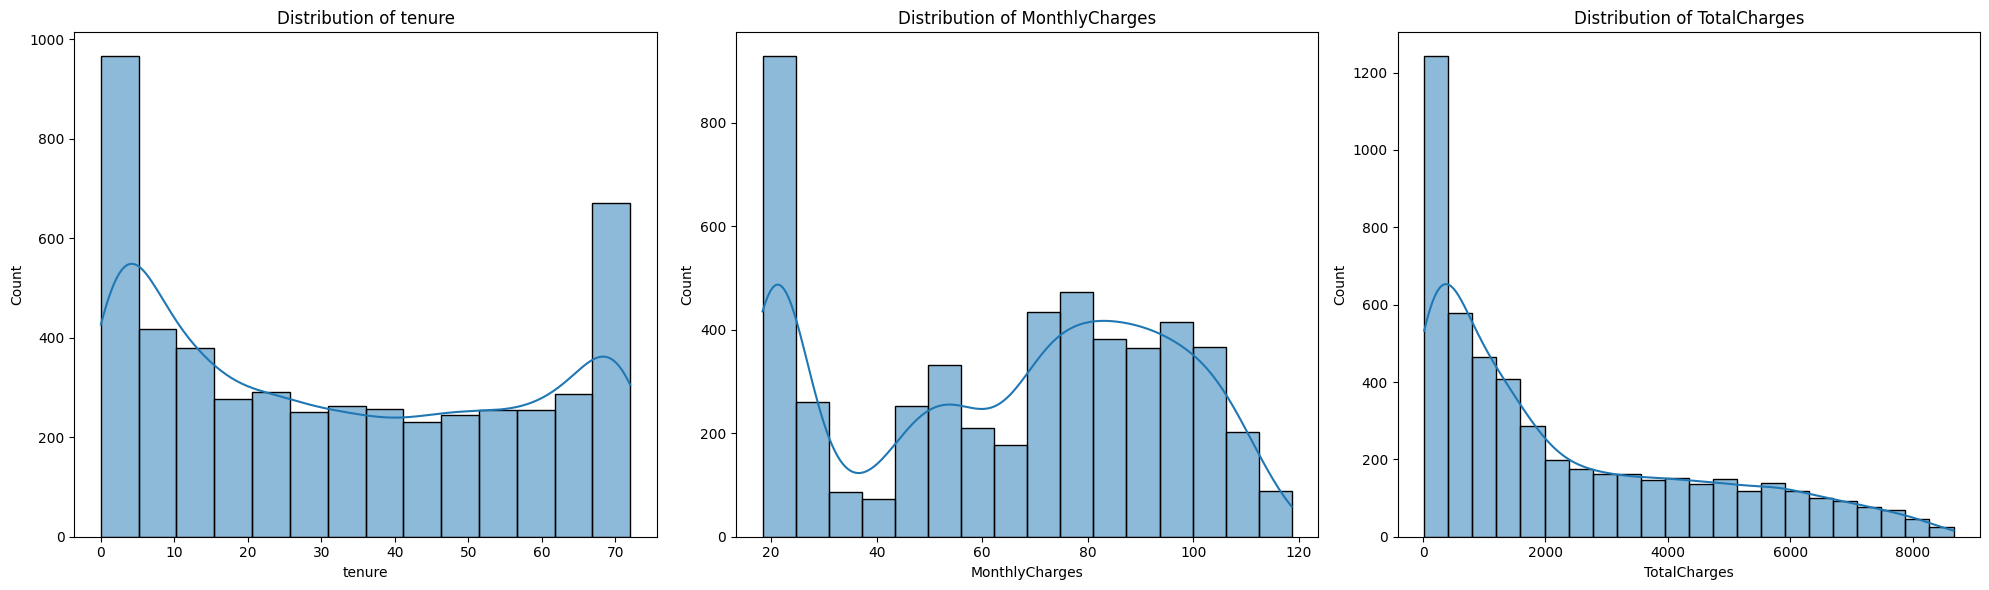

In [51]:

# Additional analysis: Correlation heatmap#+
def plot_correlation_heatmap(data):
    plt.figure(figsize=(12, 10))
    numeric_data = data.select_dtypes(include=[np.number])  # Exclude non-numeric columns
    correlation_matrix = numeric_data.corr()
    sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
    plt.title('Correlation Heatmap')
    plt.show()

# Example usage
plot_correlation_heatmap(combined_data)
#+
# Additional analysis: Distribution of numerical features#+
def plot_numerical_distributions(data, numerical_columns):
    n_rows = math.ceil(len(numerical_columns) / 3)
    
    fig, axes = plt.subplots(n_rows, 3, figsize=(20, 6 * n_rows))
    
    axes = axes.flatten()  # Flatten the axes array to ensure correct indexing
    
    for i, column in enumerate(numerical_columns):
        sns.histplot(data[column], kde=True, ax=axes[i])
        axes[i].set_title(f'Distribution of {column}')
    
    plt.tight_layout()
    plt.show()

# Example usage
plot_numerical_distributions(combined_data, ['tenure', 'MonthlyCharges', 'TotalCharges'])


### Multivariate analysis: Principal Component Analysis (PCA)

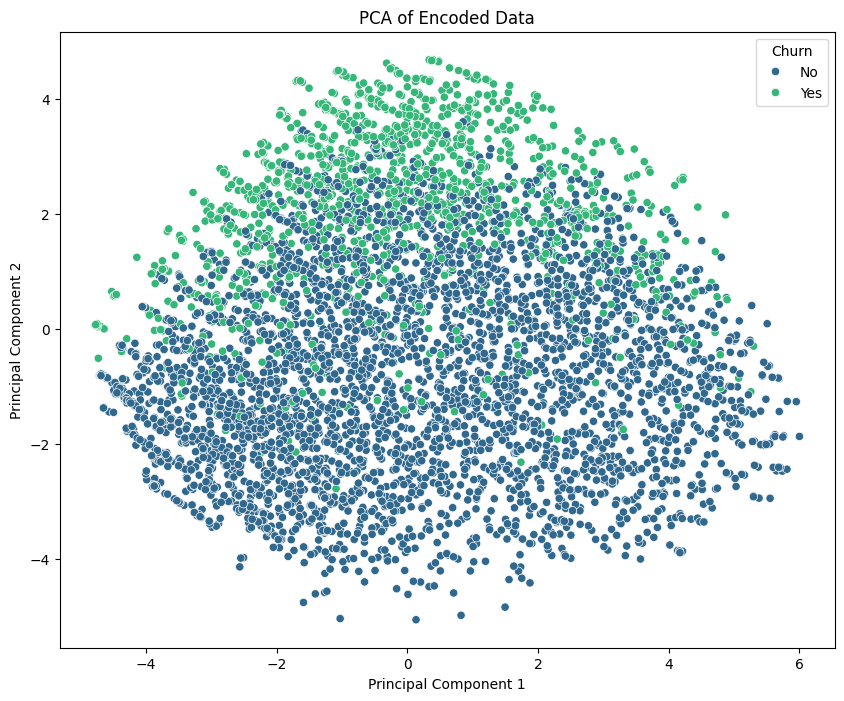

In [67]:

import sklearn.model_selection 
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


# Ensure encoded_data is defined
encoded_data = pd.get_dummies(combined_data, columns=categorical_columns, drop_first=True)

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(encoded_data)

# Perform PCA
pca = PCA(n_components=2)  # Reduce to 2 components for visualization
principal_components = pca.fit_transform(scaled_data)

# Create a DataFrame with the principal components
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Add the target variable to the PCA DataFrame
pca_df['Churn'] = combined_data['Churn']

# Plot the PCA results
plt.figure(figsize=(10, 8))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Churn', palette='viridis')
plt.title('PCA of Encoded Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


EDA

### Feature selection using Recursive Feature Elimination (RFE)

In [68]:
# One-hot encode the categorical variables
encoded_data = pd.get_dummies(combined_data, columns=categorical_columns, drop_first=True)

# Display the first few rows of the encoded dataframe
print(encoded_data.head())

   SeniorCitizen  tenure  MonthlyCharges  TotalCharges  customerID_0011-IGKFF  \
0              0       1       29.850000     29.850000                  False   
1              0      34       56.950001   1889.500000                  False   
2              0       2       53.849998    108.150002                  False   
3              0      45       42.299999   1840.750000                  False   
4              0       2       70.699997    151.649994                  False   

   customerID_0013-EXCHZ  customerID_0013-MHZWF  customerID_0013-SMEOE  \
0                  False                  False                  False   
1                  False                  False                  False   
2                  False                  False                  False   
3                  False                  False                  False   
4                  False                  False                  False   

   customerID_0014-BMAQU  customerID_0015-UOCOJ  ...  TechSupport_Ye

### Splitting the data into training and testing sets